# PyCaretで最も性能のよいアルゴリズムを探索
- re78をターゲットにする


In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, display_markdown, Markdown
from textwrap import dedent

import warnings
warnings.filterwarnings('ignore')

import pycaret.classification as caret_cls
import pycaret.regression as caret_reg

## Lalando-LoadData-RLang.ipynbで作成したCSVファイルを読み込む

In [4]:
data1 = pd.read_csv('cps1_nsw_data_R.csv')
data3 = pd.read_csv('cps3_nsw_data_R.csv')
data0 = pd.read_csv('nsw_dw_R.csv')

data3['treat'].value_counts()

0    429
1    185
Name: treat, dtype: int64

In [5]:
data = data1.copy()


x_names = ['re74', 're75',  'age', 'education', 'black',
                'hispanic', 'nodegree', 'married'] 
z_name = 'treat'
y_name = 're78'

all_columns = x_names + [ y_name]

setup_results = caret_reg.setup(data=data[ all_columns ], target=y_name, 
                                numeric_features=x_names)

,Description,Value
0,session_id,7328
1,Target,re78
2,Original Data,"(16177, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11323, 8)"


In [6]:
caret_reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5119.7514,48491661.4322,6956.7207,0.4825,3.3110,3.6938,0.2510
lr,Linear Regression,5178.1785,48878558.8000,6984.5546,0.4784,3.3808,3.7127,0.2360
lasso,Lasso Regression,5178.1844,48877480.0000,6984.4770,0.4784,3.3808,3.7128,0.0120
ridge,Ridge Regression,5178.1795,48878522.0000,6984.5520,0.4784,3.3808,3.7127,0.0090
lar,Least Angle Regression,5178.1788,48878558.5228,6984.5546,0.4784,3.3808,3.7127,0.0080
en,Elastic Net,5180.6955,48889764.4000,6985.3505,0.4783,3.3820,3.7130,0.0130
br,Bayesian Ridge,5180.9853,48893915.7805,6985.6511,0.4782,3.3820,3.7128,0.0080
llar,Lasso Least Angle Regression,5227.2575,48915841.3721,6987.4380,0.4780,3.3971,3.7170,0.0100
lightgbm,Light Gradient Boosting Machine,5161.7433,49834399.9239,7052.5770,0.4682,3.2977,3.7601,0.1110
catboost,CatBoost Regressor,5158.8530,50093664.2547,7071.2165,0.4655,3.2875,3.6063,2.0600


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7328, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
model_gbr = caret_reg.create_model('gbr', cross_validation=False)
model_gbr = caret_reg.tune_model(estimator=model_gbr, n_iter=30, choose_better=True,
                             early_stopping_max_iters=5, early_stopping=True)

model_gbr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5084.9856,44686704.1507,6684.8115,0.5246,3.3844,8.0184
1,5298.3189,49642830.9907,7045.7669,0.4779,3.4684,1.4417
2,4994.1782,44223613.2467,6650.0837,0.5081,3.1711,6.8549
3,4808.5282,40801364.2961,6387.5946,0.5542,3.2629,1.2207
4,5259.0869,49779894.4532,7055.4868,0.4753,3.4147,2.0047
5,5478.8800,54674821.0915,7394.2424,0.4259,3.4456,1.9569
6,5139.5056,49059456.6559,7004.2456,0.4645,3.3144,6.5957
7,5177.4284,50867634.5466,7132.1550,0.4786,3.3831,1.6131
8,5506.2085,54339148.5823,7371.5092,0.4117,3.3519,2.9278
9,5060.3770,46169160.0951,6794.7892,0.5113,3.2452,4.1191


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7328, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
model_lr = caret_reg.create_model('lr', cross_validation=False)
model_lr = caret_reg.tune_model(estimator=model_lr, n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5202.9878,50282524.0000,7091.0171,0.4721,3.4444,1.3051
1,4964.4082,44146536.0000,6644.2861,0.5335,3.3467,1.4354
2,5283.1118,50397608.0000,7099.1274,0.4742,3.5909,6.9477
3,5121.0010,47908916.0000,6921.6265,0.4989,3.4052,1.7567
4,5308.3091,52463936.0000,7243.1992,0.4459,3.5218,2.9718
5,5193.6519,48461780.0000,6961.4497,0.4710,3.3367,1.4957
6,5169.3589,49085496.0000,7006.1040,0.4793,3.4566,2.6984
7,5358.5195,53596444.0000,7320.9590,0.4236,3.4299,1.3721
8,4994.0928,43813864.0000,6619.2041,0.5308,3.3768,6.7315
9,5403.6055,51887500.0000,7203.2979,0.4475,3.1845,6.1375


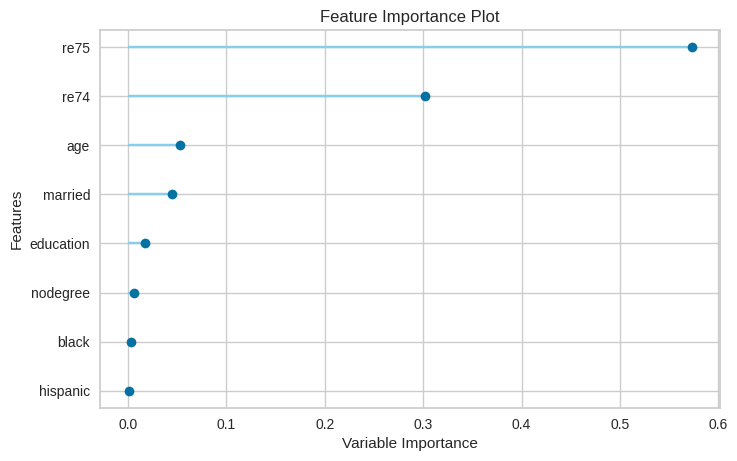

In [8]:
caret_reg.plot_model(model_gbr, plot='feature')

In [18]:
data = data0.copy()


x_names = ['re74', 're75',  'age', 'education', 'black',
                'hispanic', 'nodegree', 'married'] 
z_name = 'treat'
y_name = 're78'

all_columns = x_names + [ z_name, y_name]

setup_results = caret_reg.setup(data=data[ all_columns ], target=y_name, 
                                numeric_features=x_names + [ z_name ])

,Description,Value
0,session_id,8994
1,Target,re78
2,Original Data,"(445, 10)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(311, 9)"


In [19]:
caret_reg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,4495.4981,45038692.5461,6397.6904,-0.0628,4.5533,1.2772,0.0120
br,Bayesian Ridge,4705.1581,44215597.6217,6365.7346,-0.0633,4.7382,1.7343,0.0050
en,Elastic Net,4709.3244,43633109.2000,6350.8459,-0.0739,4.7170,1.7384,0.0060
llar,Lasso Least Angle Regression,4713.0817,43830602.5192,6368.4186,-0.0850,4.6896,1.7298,0.0060
ridge,Ridge Regression,4718.8525,43901599.2000,6376.1999,-0.0888,4.6871,1.7323,0.0060
lasso,Lasso Regression,4721.2628,43949315.6000,6379.8305,-0.0902,4.6864,1.7331,0.0060
lr,Linear Regression,4721.7241,43954327.4000,6380.2943,-0.0905,4.6862,1.7337,0.0070
lar,Least Angle Regression,4721.7248,43954340.4636,6380.2953,-0.0905,4.6862,1.7337,0.0060
omp,Orthogonal Matching Pursuit,4800.1394,45059187.3481,6449.5773,-0.1160,4.7501,1.7937,0.0050
lightgbm,Light Gradient Boosting Machine,4928.6483,48448830.7596,6755.7055,-0.2385,4.6765,1.6030,0.0150


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [23]:
model = caret_reg.create_model('huber', cross_validation=False)
model = caret_reg.tune_model(estimator=model, n_iter=30, early_stopping_max_iters=3 ,early_stopping=True, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4665.9949,52512378.0778,7246.5425,-0.0513,4.1049,0.8504
1,3989.6605,31334133.4533,5597.6900,0.0009,3.6840,0.7553
2,5881.7555,120348262.1913,10970.3356,-0.0159,5.0609,0.7731
3,3919.5284,22724726.8971,4767.0459,-0.1952,4.3877,1.9095
4,4820.6319,31652894.3671,5626.0905,-0.0013,5.7133,1.2752
5,3955.5272,20677562.0044,4547.2587,-0.0297,5.4644,0.5663
6,4218.3520,32004148.8120,5657.2209,0.0025,3.8704,1.8307
7,4872.5949,43631369.0862,6605.4045,0.0334,4.0530,1.1735
8,5735.6027,64553704.6933,8034.5320,-0.0736,4.7784,0.5553
9,3589.5374,17324694.5341,4162.2944,-0.1636,5.0970,6.0078


In [24]:
model

HuberRegressor(alpha=0.0001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

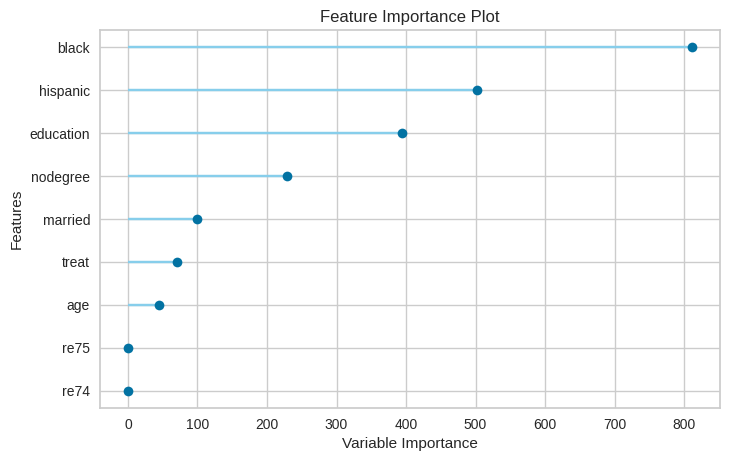

In [22]:
caret_reg.plot_model(model, plot='feature')